In [30]:
# this command is executed twice for interactive plotting in Jupyter notebook
%matplotlib notebook
%matplotlib notebook

In [1]:
from pathlib import Path, PosixPath
import pickle as pkl
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
from model.camels_utilities import load_usgs, load_forcings

In [ ]:
test_start_date = '10/01/1989'
test_end_date = '09/30/1999'
test_dates = pd.date_range(test_start_date,test_end_date)

In [3]:
# prepare to load calibrated sacsma runs
results_dir = Path('/home/gsnearing/projects/multi-inputs/SACSMA-SNOW17/results')
forcing_types = ['daymet', 'maurer','nldas']
config_nums = list(range(1,11))

# get all basins
dummy_run_dir = '/home/gsnearing/projects/multi-inputs/SACSMA-SNOW17/results/daymet/config_1'
basin_files = list(Path(dummy_run_dir).glob('*.pkl'))
basins = []
for bfile in basin_files:
    basins.append(str(bfile).split('/')[-1].split('.')[0])
num_basins = len(basins)

# init storage
sacsma = {}
experiment_multiindex = pd.MultiIndex.from_product([forcing_types, config_nums])
for basin in tqdm(basins):
    sacsma[basin] = pd.DataFrame(columns=experiment_multiindex)

In [9]:
# load discharge data
camels_dir = Path('/home/gsnearing/projects/camels_data/basin_dataset_public_v1p2')
usgs = {}
for basin in tqdm(basins):
    _, area = load_forcings(basin,'nldas')
    usgs[basin] = load_usgs(basin, area)

In [11]:
# load calibrated sacsma runs
for ftype in forcing_types:
    print(ftype)
    for cnum in tqdm(config_nums):
        run_dir = results_dir / ftype / f'config_{cnum}'
        basin_files = list(run_dir.glob('*.pkl')) 
        try:
            assert len(basin_files) == num_basins
        except:
            continue
        for basin in basins:
            basin_file = run_dir / f'{basin}.pkl'
            with open (basin_file, 'rb') as f:
                data = pkl.load(f)
            sacsma[basin][(ftype,cnum)] = data[1]

daymet



maurer



nldas


In [22]:
sacsma_restart_means = {}
for basin in tqdm(basins):
    sacsma_restart_means[basin] = pd.DataFrame(index=sacsma[basin][(ftype,cnum)].index, columns=forcing_types)
    for ftype in forcing_types:
        sacsma_restart_means[basin][ftype] = sacsma[basin][ftype].mean(axis=1)
    asdf

NameError: name 'asdf' is not defined

,daymet,maurer,nldas
Date,,,
1980-01-01,118.238403,87.384027,126.617897
1980-01-02,59.122307,70.214870,65.724266
1980-01-03,39.191429,43.828547,40.674446
1980-01-04,31.142193,30.626327,27.134869
1980-01-05,25.261347,24.220769,19.760311
...,...,...,...
2014-12-27,14.879840,NaN,1.355984
2014-12-28,12.234453,NaN,1.336282
2014-12-29,11.227589,NaN,1.302314


<IPython.core.display.Javascript object>


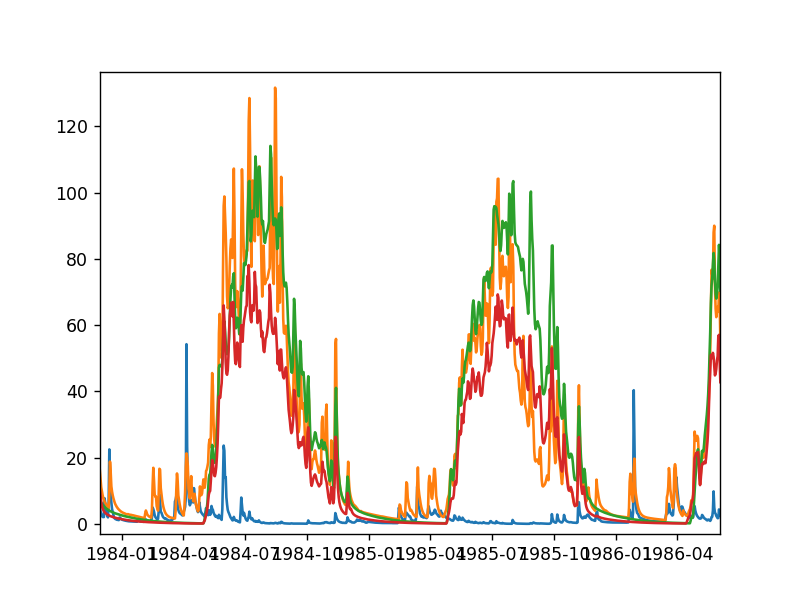

In [31]:
import matplotlib.pyplot as plt
plt.plot(usgs[basin].QObs)
plt.plot(sacsma_restart_means[basin])